<a href="https://colab.research.google.com/github/dude10116/DavisGrahamCosc470s24/blob/main/Davis_Graham_FastNeuralNetwork_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The **Hello, world** of neural networks
This code builds a simple neural network that can recognize handwritten 28x28 pixel digits.

Our first version will have 15 neurons in the hidden layer and 10 output neurons.

See image below:
http://neuralnetworksanddeeplearning.com/images/tikz12.png

How many weights in this network?
11760 weights in the first layer (784 * 15) and 150 weights in the second layer (15 * 10) = 11910 weights total
15 biases in the hidden layer and 10 biases in the output layer = 25 biases total.
11910 + 25 = 11935 parameters!

In [ ]:
!git clone https://github.com/MichalDanielDobrzanski/DeepLearningPython nn
%cd nn

Cloning into 'nn'...
remote: Enumerating objects: 63, done.
remote: Counting objects: 100% (8/8), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 63 (delta 1), reused 3 (delta 0), pack-reused 55
Receiving objects: 100% (63/63), 16.43 MiB | 16.96 MiB/s, done.
Resolving deltas: 100% (28/28), done.
/content/nn


In [ ]:
# this code depends on having executed the previous cell
# (i.e., you need to have cloned the nn code and cd'ed into it)
import network
import mnist_loader
training_data, validation_data, test_data = mnist_loader.load_data_wrapper()
training_data = list(training_data)
test_data = list(test_data)


In [ ]:
import numpy as np
print(np.shape(training_data))
print(np.shape(training_data[0][0]))
print(np.shape(training_data[0][1]))
print(training_data[0][1])

(50000, 2)
(784, 1)
(10, 1)
[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]]


/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:2009: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  result = asarray(a).shape


In [19]:
# average digit darkness
# step 1 - write a function that can calculate the darkness of a single image
def image_darkness(imgpixeldata):
  darkness_total = 0
  for x in imgpixeldata:
    darkness_total = darkness_total + x
  return darkness_total[0]

# step 2 - call that function on all the training images and calculate the average darkness of each digit
# There are 10 darkness totals because digits 0-9, which equals 10 in total, are from the MNIST data set.
# Each digit has a darkness total that must be calculated seperately.

darkness = image_darkness(training_data[0][0])
whichimage = np.argmax(training_data[0][1])
print(f"The first image was a {whichimage} and its darkness was {darkness}")
darkness = image_darkness(training_data[1][0])
whichimage = np.argmax(training_data[1][1])
print(f"The second image was a {whichimage} and its darkness was {darkness}")

# define a 10-element list of darkness totals
darkness_totals = [0 for _ in range(10)]
# define a 10-elment list of digit counts
darkness_counts = [0 for _ in range(10)]

# iterate through each image and update the two data structures
for training_img in training_data:
  darkness = image_darkness(training_img[0])
  whichimage = np.argmax(training_img[1])
  darkness_totals[whichimage] += darkness
  darkness_counts[whichimage] += 1

# now calculate the averages
darkness_averages = [darkness_totals[i]/darkness_counts[i] for i in range(10)]

print(darkness_counts)
print(darkness_averages)

# step 3 - use those averages to classify all the test data images and count how many of each digit you get right
def find_closest(darkness, darkness_averages):
  # add code here that determines which average was closest to darkness
  return 0

correct_counts = [0 for _ in range(10)]
wrong_counts = [0 for _ in range(10)]

for imgdata, whichimage in test_data:
  darkness = image_darkness(imgdata)
  # see which darkness_average is closest to "darkness" and make that our classification for this image
  closest_digit = find_closest(darkness, darkness_averages)
  if closest_digit == whichimage:
    correct_counts[whichimage] += 1
  else:
    wrong_counts[whichimage] += 1

# now that we have our correct/wrong counts, turn that into accuracies
digit_accuracies = [correct_counts[i]/(correct_counts[i]+wrong_counts[i]) for i in range(10)]
print(digit_accuracies)

The first image was a 5 and its darkness was 107.51953125
The second image was a 0 and its darkness was 121.46484375
[4932, 5678, 4968, 5101, 4859, 4506, 4951, 5175, 4842, 4988]
[135.8691200324412, 59.66034750352237, 116.294303857186, 110.87092451235051, 95.22073970338548, 100.34646166222814, 107.38312020298929, 89.8788345410628, 117.88056410703221, 96.0455585592923]
[1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [ ]:
print(np.shape(test_data))
print(np.shape(test_data[0]))
print(test_data[0][1])


(10000, 2)
(2,)
7


In [ ]:
# part 2 - use this default configuration and the following hyper-parameters
#    epochs - 30
#    batch size - 10
#    learning rate - 3.0
net = network.Network([784, 30, 10])
net.SGD(training_data, 30, 10, 3.0, test_data=test_data)


Epoch 0 : 8958 / 10000
Epoch 1 : 9271 / 10000
Epoch 2 : 9337 / 10000
Epoch 3 : 9359 / 10000
Epoch 4 : 9376 / 10000
Epoch 5 : 9367 / 10000
Epoch 6 : 9411 / 10000
Epoch 7 : 9385 / 10000
Epoch 8 : 9413 / 10000
Epoch 9 : 9407 / 10000
Epoch 10 : 9437 / 10000
Epoch 11 : 9442 / 10000
Epoch 12 : 9455 / 10000
Epoch 13 : 9456 / 10000
Epoch 14 : 9442 / 10000
Epoch 15 : 9470 / 10000
Epoch 16 : 9450 / 10000
Epoch 17 : 9462 / 10000
Epoch 18 : 9451 / 10000
Epoch 19 : 9453 / 10000
Epoch 20 : 9444 / 10000
Epoch 21 : 9467 / 10000
Epoch 22 : 9455 / 10000
Epoch 23 : 9485 / 10000
Epoch 24 : 9473 / 10000
Epoch 25 : 9462 / 10000
Epoch 26 : 9476 / 10000
Epoch 27 : 9492 / 10000
Epoch 28 : 9462 / 10000
Epoch 29 : 9485 / 10000


In [ ]:
import numpy as np
a = net.feedforward(test_data[2][0])
print(a)
print(np.argmax(a))
print(test_data[2][1])

# per digit accuracies
# loop through the test data again
# calculate how many of each digit was classified correctly

correct_counts = [0 for _ in range(10)]
digit_counts = [0 for _ in range(10)]

for (x, y) in test_data:
  a = np.argmax(net.feedforward(x))
  if a == y:
    correct_counts[y] += 1
  digit_counts[y] += 1

print(correct_counts)
print(digit_counts)
accuracies = [correct_counts[i]/digit_counts[i] for i in range(10)]
print(accuracies)

[[1.00560091e-13]
 [9.99068611e-01]
 [1.57520567e-05]
 [5.69105722e-06]
 [1.78291325e-11]
 [5.07502063e-07]
 [7.72172403e-06]
 [9.00642189e-10]
 [2.37304519e-06]
 [2.32996362e-10]]
1
1
[956, 1119, 962, 950, 942, 813, 913, 980, 927, 923]
[980, 1135, 1032, 1010, 982, 892, 958, 1028, 974, 1009]
[0.9755102040816327, 0.9859030837004406, 0.9321705426356589, 0.9405940594059405, 0.9592668024439919, 0.9114349775784754, 0.9530271398747391, 0.953307392996109, 0.9517453798767967, 0.9147670961347869]


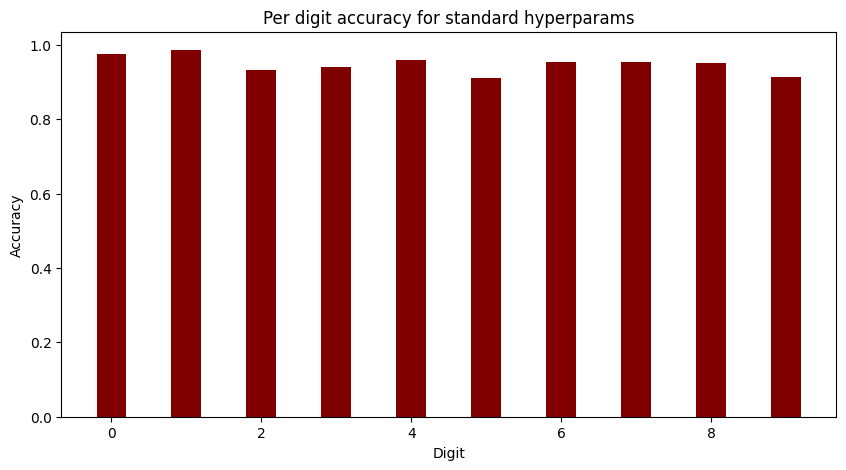

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (10, 5))
 # creating the bar plot
plt.bar(range(0,10), accuracies, color ='maroon',
        width = 0.4)
plt.xlabel("Digit")
plt.ylabel("Accuracy")
plt.title("Per digit accuracy for standard hyperparams")
plt.show()

In [ ]:
print(np.shape(net.weights[0]))
print(net.weights[0])

(30, 784)
[[ 0.0215151  -0.04729249 -0.44721234 ... -1.97831409 -0.2865727
   0.88160148]
 [ 2.36208788  0.6038336   0.20396425 ...  0.3926295  -0.86184143
   0.64770832]
 [-1.14750678 -0.97593438  0.72427559 ... -0.4883032  -0.76593551
   0.15989463]
 ...
 [ 0.4694041   0.03909368  0.36883623 ...  0.0452612   1.23588569
   0.54394539]
 [-0.18138153  0.72164685  1.92287457 ...  0.25001934  1.10857264
   1.29902218]
 [ 0.91300424  2.38522093 -0.11537195 ...  1.69392222 -0.48073141
  -0.70233165]]


In [ ]:
print(np.shape(net.weights[1]))
print(net.weights[1])

(10, 30)
[[ 3.67183713  2.35868514 -6.43078049  0.14005056  4.38970399  2.49434832
  -0.40937287 -1.94369755  2.4259371   3.64487122 -7.53660691  1.8959186
  -4.91148141  0.36191836  0.5634      2.27636407  0.52070603  3.62218105
  -2.29334236 -3.18221871 -3.60816435 -1.38963331 -0.10855549 -4.1656265
  -0.30824127 -1.09473708  5.64011432  1.44139839 -5.50467125  0.73341887]
 [-0.93112177  0.54200062 -3.31082687 -5.03686603 -1.76140692 -2.96273987
   2.96767471  2.23596389 -1.86160948 -2.75913581 -2.86599827 -0.46055604
   1.48191966 -0.24667187 -0.89017888 -5.6762719   1.42315355  2.7587841
   2.94970173  2.63151541 -0.24542711 -2.73384039  1.53848519  6.3239753
   5.65553213 -1.38490167 -1.53858687  1.20156804 -0.91376295  5.22033055]
 [ 1.39031944  1.30434834 -4.42748204  3.19220362  3.21947353  0.74491765
   2.5373595   2.78566455 -3.53895725 -5.66059501 -3.35886548  1.62926675
   1.06857464  0.34020818  2.83152287  0.30922755  0.3007657  -4.44173019
  -3.32958078 -3.56633148  0.02

In [18]:
# part 3 - experiment with different hyper parameters
# epochs - 5, 15, 30, 60 (batch size 10, learning 3.0),
# batch - 5, 10, 50, 100 (epochs 30, learning 3.0),
# learning rate - 1.0, 3.0, 5.0 (epochs 30, batch size 10),

import time

# Define the hyperparameters
epochs = [5, 15, 30, 60]
batch_sizes = [5, 10, 50, 100]
learning_rates = [1.0, 3.0, 5.0]

# Vary the number of training epochs
for epoch in epochs:
    start_time = time.time()
    net = network.Network([784, 30, 10])
    net.SGD(training_data, epoch, 10, 3.0, test_data=test_data)
    end_time = time.time()
    print(f"Training time for {epoch} epochs: {end_time - start_time} seconds")

# Vary the batch size
for batch_size in batch_sizes:
    start_time = time.time()
    net = network.Network([784, 30, 10])
    net.SGD(training_data, 30, batch_size, 3.0, test_data=test_data)
    end_time = time.time()
    print(f"Training time for batch size {batch_size}: {end_time - start_time} seconds")

# Vary the learning rate
for learning_rate in learning_rates:
    start_time = time.time()
    net = network.Network([784, 30, 10])
    net.SGD(training_data, 30, 10, learning_rate, test_data=test_data)
    end_time = time.time()
    print(f"Training time for learning rate {learning_rate}: {end_time - start_time} seconds")


Epoch 0 : 9047 / 10000
Epoch 1 : 9226 / 10000
Epoch 2 : 9272 / 10000
Epoch 3 : 9317 / 10000
Epoch 4 : 9331 / 10000
Training time for 5 epochs: 58.06164789199829 seconds
Epoch 0 : 8207 / 10000
Epoch 1 : 8267 / 10000
Epoch 2 : 8428 / 10000
Epoch 3 : 8462 / 10000
Epoch 4 : 8489 / 10000
Epoch 5 : 8474 / 10000
Epoch 6 : 8484 / 10000
Epoch 7 : 8499 / 10000
Epoch 8 : 8510 / 10000
Epoch 9 : 8501 / 10000
Epoch 10 : 8500 / 10000
Epoch 11 : 8521 / 10000
Epoch 12 : 8551 / 10000
Epoch 13 : 8538 / 10000
Epoch 14 : 8530 / 10000
Training time for 15 epochs: 174.9431300163269 seconds
Epoch 0 : 9109 / 10000
Epoch 1 : 9207 / 10000
Epoch 2 : 9312 / 10000
Epoch 3 : 9304 / 10000
Epoch 4 : 9352 / 10000
Epoch 5 : 9350 / 10000
Epoch 6 : 9333 / 10000
Epoch 7 : 9363 / 10000
Epoch 8 : 9411 / 10000
Epoch 9 : 9401 / 10000
Epoch 10 : 9435 / 10000
Epoch 11 : 9437 / 10000
Epoch 12 : 9437 / 10000
Epoch 13 : 9422 / 10000
Epoch 14 : 9427 / 10000
Epoch 15 : 9447 / 10000
Epoch 16 : 9440 / 10000
Epoch 17 : 9469 / 10000
Epoc